# Weekly Dairy Product Prices - Predicting prices




In this notebook I am going to attempt to predict the prices of dairy products in the US. 

## Dataset
I will be using the **[https://www.kaggle.com/sohier/weekly-dairy-product-prices](https://www.kaggle.com/sohier/weekly-dairy-product-prices)** uploaded to Keggle by [@sohier](https://www.kaggle.com/sohier)

In specific I am going to analize the **"40 Pound Block Cheddar Cheese Prices and Sales" data.**

In [1]:
%matplotlib inline
import csv
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime as dt

Read the data and move it into a list. Also remove the (** " **) quotes from the data

In [2]:
file_name = 'Datamart-Export_DY_WK100-40 Pound Block Cheddar Cheese Prices and Sales_20170829_122601.csv'
data = []
with open(file_name, 'r') as f:
    data = [i.replace('"', '').split(',') for i in f.read().split('\n')]

In [3]:
data[:3]

[['Week Ending Date', 'Report Date', 'Date', 'Weighted Prices', 'Sales'],
 ['08/19/2017', '08/23/2017', '07/22', '1.5907', '11', '217', '751'],
 ['08/19/2017', '08/23/2017', '07/29', '1.6226', '11', '933', '852']]

In [4]:
data[-3:]

[['03/31/2012', '04/04/2012', '03/10', '1.4926', '9', '904', '507'],
 ['03/31/2012', '04/04/2012', '03/03', '1.4873', '9', '306', '594'],
 ['']]

We need to remove the last row, It is empty.

We also separate the header form the data.

In [5]:
header = data[0]
data = data[1:-1]

We extract the prices and the dates. The dates **Do not have the year**, we need to get it from the Report Date Column

In [6]:
dates = []
years = []
prices = []
for row in data:
    # Next line, gets the column 'Report Date' and takes only the year from it.
    years.append(row[1].split('/')[-1])
    dates.append(row[2])
    prices.append(row[3])

We compleat the format of the dates.

In [7]:
dates = [date + '/' + year for date, year in zip(dates, years)]

In [8]:
dates[-5:]

['03/31/2012', '03/24/2012', '03/17/2012', '03/10/2012', '03/03/2012']

Using the 'datetime' library we conver the data to be used to plot it.

In [9]:
trX = np.array([dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates])
trY = np.array([float(i) for i in prices])

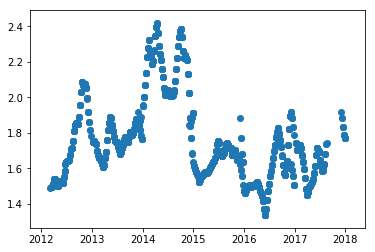

In [10]:
plt.scatter(trX, trY)

## Implementation of Polynomial Regression Regession

Set the hyper-parameters

In [11]:
learning_rate = 0.01
epochs = 50

num_coeffs = 8

One more change to the date. **x** has datatime objects, we need them to be a number

In [12]:
trX = [(i-dt.date(2010,1,1)).total_seconds() for i in trX]

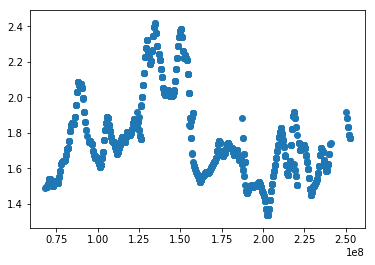

In [13]:
plt.scatter(trX, trY)

We define the placeholder for the model

In [14]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

We define the Model

In [15]:
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

Set up the parameter vector to zeros

In [16]:
w = tf.Variable([0.] * num_coeffs, name='parameters')
y_model = model(X, w)

We define a simple cost function

In [17]:
cost = tf.reduce_sum(tf.square(Y-y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Star the session, initialize the variables and run the trainig algorithm

In [18]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for epoch in range(epochs):
        for (x,y) in zip(trX, trY):
            sess.run(train_op, feed_dict={X: x, Y:y})
    
    w_val = sess.run(w)

In [19]:
w_val

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan], dtype=float32)

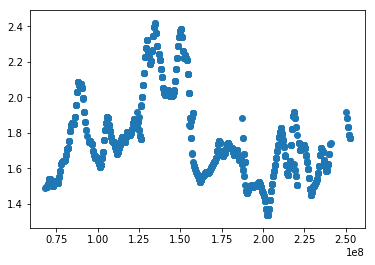

In [20]:
plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')